# Configuring the backend

Visisipy performs all optical simulations in a backend, which uses existing optical simulation software to perform the calculations.
Multiple backends are available:

- [**OpticStudio**][opticstudio]: commercial ray tracing software. Visisipy uses [ZOSPy][zospy][^zospy] to connect with OpticStudio.
- [**Optiland**][optiland]: an open-source Python library for optical simulations.

Backends are 'stateful': they keep track of the current state of the optical system, including the current field and wavelength.
This allows for efficient calculations and reduces the need to repeatedly set up the optical system.
Various optical system properties, for example the fields and wavelengths, are also stored in the backend.

:::{tip}
As a rule of thumb, settings that would be configured in OpticStudio's System Explorer should be configured in the backend.
:::

[zospy]: https://zospy.readthedocs.io/
[opticstudio]: https://www.ansys.com/products/optics/ansys-zemax-opticstudio
[optiland]: https://optiland.readthedocs.io/

## Setting the backend

The preferred backend can be selected using {py:func}`visisipy.set_backend <visisipy.backend.set_backend>`:

In [1]:
import visisipy

visisipy.set_backend("optiland")  # or "opticstudio"

## Updating settings

Settings can be updated using {py:func}`visisipy.update_settings <visisipy.backend.update_settings>`.
Supported parameters are specified by {py:class}`visisipy.backend.BackendSettings`.
Furthermore, some parameters are backend-specific.
For example, the OpticStudio backend allows to configure Ray Aiming, which is not available in Optiland.
These OpticStudio-specific parameters are specified in {py:class}`visisipy.opticstudio.backend.OpticStudioSettings`.


In [15]:
visisipy.update_settings(
    field_type="angle",
    fields=[(0, 0), (0, 30)],
    wavelengths=[0.400, 0.500, 0.600],
    aperture_type="entrance_pupil_diameter",
    aperture_value=1.348,
)

Optiland allows to configure the backend for numerical computations.
This backend is also managed through the {py:class}`Optiland backend settings <visisipy.optiland.backend.OptilandSettings>`.
By default, all computations are performed using `numpy`.
To use GPU acceleration, the `torch` computation backend can be selected:

```python
visisipy.update_settings(
    computation_backend="torch",
    torch_device="cuda",  # or "cpu"
)
```

## Getting the backend

In some advanced cases, it may be necessary to access the backend directly.
The backend can be accessed using {py:func}`visisipy.get_backend <visisipy.backend.get_backend>`.
Note that this function will initialize the default backend if no backend is set.

:::{dropdown} More information about backend objects
A backend is a class that implements {py:class}`visisipy.backend.BaseBackend`.
However, backend classes are not intended to be instantiated.
Instead, all state is managed on the class object itself.
The main reason why the backend is a class, is to ensure all backends implement the {py:class}`visisipy.backend.BaseBackend` interface.
:::

In [19]:
backend = visisipy.get_backend()

print("Field type:", backend.get_setting("field_type"))  # Get the field type

Field type: angle


## Getting the optical system

It may also be necessary to access the optical system directly, for example to put a camera or a lens in front of the eye model.
Visisipy provides various functions to access the optical system, depending on the backend:

- When using OpticStudio, the optical system can be accessed using {py:func}`visisipy.get_oss <visisipy.backend.get_oss>`.
- When using Optiland, the optical system can be accessed using {py:func}`visisipy.get_os <visisipy.backend.get_optic>`.

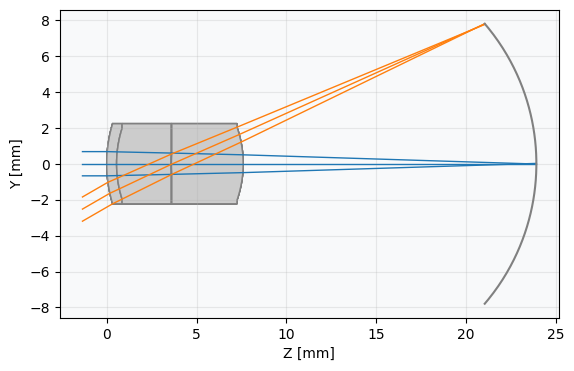

In [17]:
# Create an eye model and draw it
model = visisipy.EyeModel()
model.build()

visisipy.backend.get_optic().draw()